## Building a prediction model for if an participant in the dataset has smoked during their life. 
**This is private data. Please do not share**

* Date: 2017 - 12 - 22

* Version: 1
* Editors: Fionn Delahunty 

------- 

This notebook (R code) trys to build a prediction model for if a participant has ever smoked. 


__Summary of steps__

_ Exploratory data analysis _ 
1. Dataset import 
2. Testing distribution of smoking 

_ Model building _ 

4. Model building using logistic regression 
5. Testing for interactions 
5. Testing the effectiveness of the model 


------
__ Conclusion __

BAA BAA Blacksheep


### 1. Dataset import & data splitting 

In [43]:
original_data <- read.csv(file="Risklab_2.4.csv", header=TRUE, sep=",")

In [41]:
test_data <- original_data[1:200,]
data <- original_data[201:1328,]

### 2. Testing distribution of smoking (Yes/No)


 No Yes 
586 534 

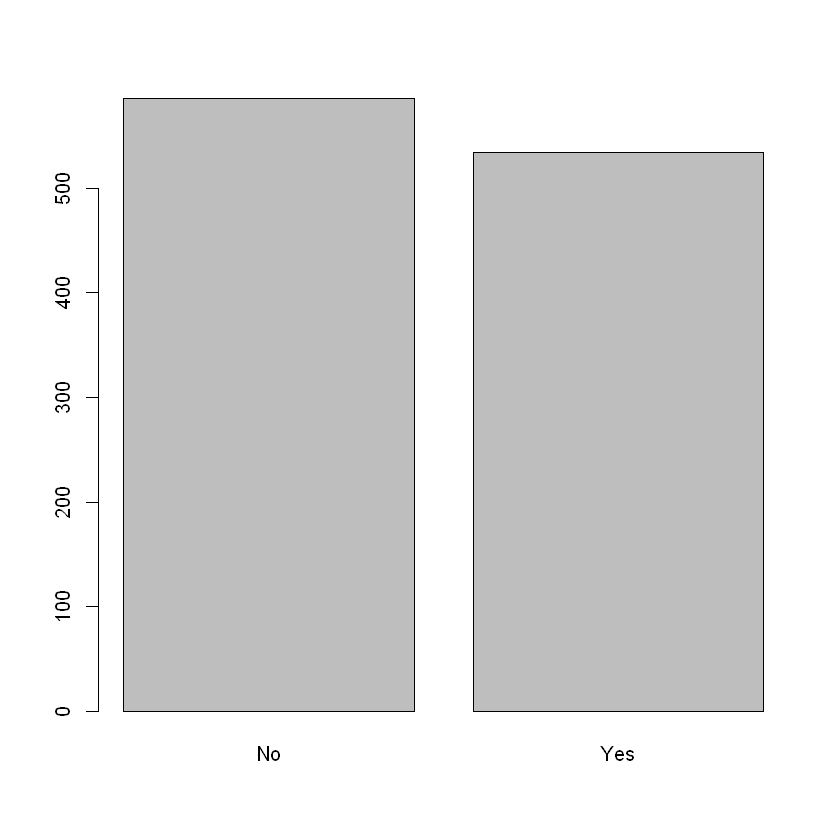

In [44]:
library(psych)
table(data$EVER_SMOKED)
plot(data$EVER_SMOKED)

### 3. Model building (logistic regression) 

In [45]:
gg<-glm(EVER_SMOKED~AGE+BIS_Cog_Instability+BIS_Perseverance+BIS_self_control+BIS_Cog_Complexity+DOS_Ethical+DOS_Fin_Investment+DOS_Fin_Gambling+DOS_HealthSafety+DOS_Recreational+DOS_Social,data=data,family="binomial")
print(summary(gg))


Call:
glm(formula = EVER_SMOKED ~ AGE + BIS_Cog_Instability + BIS_Perseverance + 
    BIS_self_control + BIS_Cog_Complexity + DOS_Ethical + DOS_Fin_Investment + 
    DOS_Fin_Gambling + DOS_HealthSafety + DOS_Recreational + 
    DOS_Social, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0779  -1.0723  -0.7701   1.1588   1.7531  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.3635910  0.7076654  -1.927  0.05399 .  
AGE                  0.0161641  0.0056168   2.878  0.00400 ** 
BIS_Cog_Instability  0.0973134  0.0359722   2.705  0.00683 ** 
BIS_Perseverance    -0.0004867  0.0318083  -0.015  0.98779    
BIS_self_control    -0.0444875  0.0239007  -1.861  0.06269 .  
BIS_Cog_Complexity  -0.0222689  0.0320642  -0.695  0.48736    
DOS_Ethical          0.0137325  0.0127951   1.073  0.28316    
DOS_Fin_Investment  -0.0418991  0.0164910  -2.541  0.01106 *  
DOS_Fin_Gambling     0.038711

__ Notes: __ 
* __ Chi Squared: __ Cumulative probability of 0, meaning we reject the fit of the binomial model with logit link

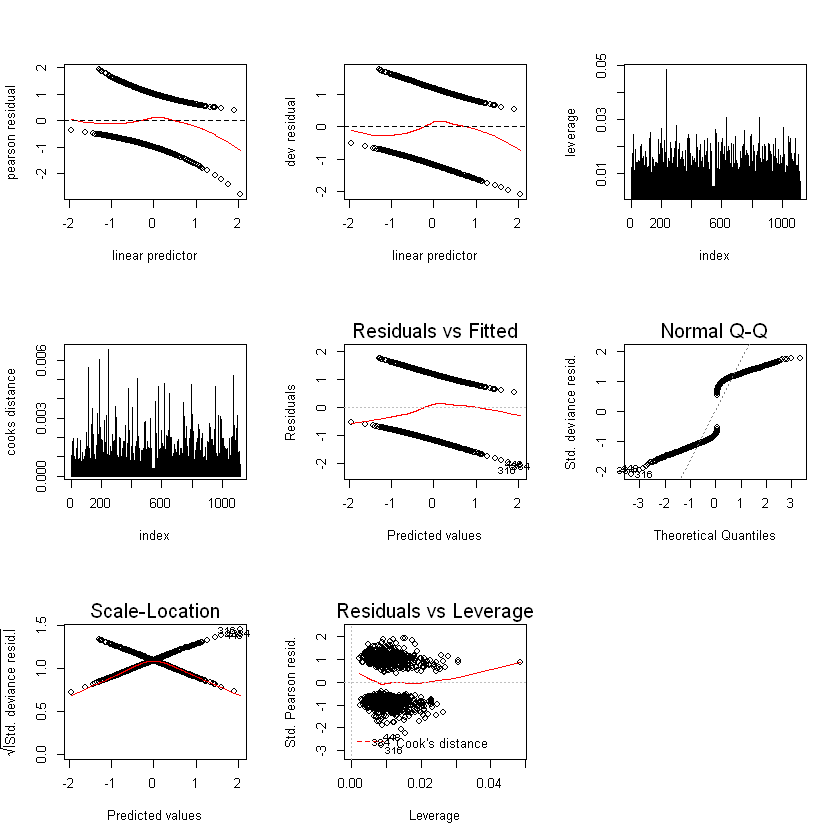

In [46]:
#Code taken from 	Rebecka Jörnsten assignments 
par(mfrow = c(3,3))
res<-residuals(gg,"pearson")
plot(logit(gg$fit),res,xlab="linear predictor",ylab="pearson residual")
ll<-loess(res[sort.list(logit(gg$fit))]~sort(logit(gg$fit)))
lines(ll$x,ll$fit,col=2)
abline(h=0,lty=2)
res<-residuals(gg,"deviance")
plot(logit(gg$fit),res,xlab="linear predictor",ylab="dev residual")
ll<-loess(res[sort.list(logit(gg$fit))]~sort(logit(gg$fit)))
lines(ll$x,ll$fit,col=2)
abline(h=0,lty=2)
hh<-hatvalues(gg)
plot(hh,type="h",ylab="leverage",xlab="index")
library(stats)
dd<-cooks.distance(gg)
plot(dd,type="h",ylab="cooks distance",xlab="index")
plot(gg)

In [47]:
step(gg)

Start:  AIC=1497.05
EVER_SMOKED ~ AGE + BIS_Cog_Instability + BIS_Perseverance + 
    BIS_self_control + BIS_Cog_Complexity + DOS_Ethical + DOS_Fin_Investment + 
    DOS_Fin_Gambling + DOS_HealthSafety + DOS_Recreational + 
    DOS_Social

                      Df Deviance    AIC
- BIS_Perseverance     1   1473.0 1495.0
- DOS_Social           1   1473.1 1495.1
- DOS_Recreational     1   1473.3 1495.3
- BIS_Cog_Complexity   1   1473.5 1495.5
- DOS_Ethical          1   1474.2 1496.2
<none>                     1473.0 1497.0
- BIS_self_control     1   1476.5 1498.5
- DOS_Fin_Gambling     1   1478.3 1500.3
- DOS_Fin_Investment   1   1479.6 1501.6
- BIS_Cog_Instability  1   1480.4 1502.4
- AGE                  1   1481.4 1503.4
- DOS_HealthSafety     1   1489.8 1511.8

Step:  AIC=1495.05
EVER_SMOKED ~ AGE + BIS_Cog_Instability + BIS_self_control + 
    BIS_Cog_Complexity + DOS_Ethical + DOS_Fin_Investment + DOS_Fin_Gambling + 
    DOS_HealthSafety + DOS_Recreational + DOS_Social

           


Call:  glm(formula = EVER_SMOKED ~ AGE + BIS_Cog_Instability + BIS_self_control + 
    DOS_Fin_Investment + DOS_Fin_Gambling + DOS_HealthSafety, 
    family = "binomial", data = data)

Coefficients:
        (Intercept)                  AGE  BIS_Cog_Instability  
           -1.42683              0.01507              0.09620  
   BIS_self_control   DOS_Fin_Investment     DOS_Fin_Gambling  
           -0.04972             -0.04063              0.04073  
   DOS_HealthSafety  
            0.05629  

Degrees of Freedom: 1117 Total (i.e. Null);  1111 Residual
  (10 observations deleted due to missingness)
Null Deviance:	    1547 
Residual Deviance: 1475 	AIC: 1489

## Notes 
* __ Pearson Residuals plots: __Not an ideal plot along the 0 axis, but also not to bad. There is no values above the |ri| > 2 threshold. We tried some log transformed but no clear benefit. Overall happy enought to go forward. 
* __ Deviance Residuals: __ No values above the |di| > 2 threshold
* __ Levergae & Cooks Distance: __ Only one extreme value in the cooks distance plot . 
* __ Link test: __ This test should have been preformed but we couldn't get the R code to work correctly. However, given the other result we would expect the plot not to display a linear tread, but rather a screw. 

In [48]:
gg<-glm(EVER_SMOKED~AGE+BIS_Cog_Instability+BIS_self_control+DOS_Fin_Investment+DOS_Fin_Gambling+DOS_HealthSafety,data=data,family="binomial")
print(summary(gg))
selg<-step(gg,trace=F)
ss<-summary(selg)
c2<-solve(diag(diag(ss$cov.sc)))^{1/2}%*%ss$cov.sc%*%solve(diag(diag(ss$cov.sc)))^{1/2}
print(c2)



Call:
glm(formula = EVER_SMOKED ~ AGE + BIS_Cog_Instability + BIS_self_control + 
    DOS_Fin_Investment + DOS_Fin_Gambling + DOS_HealthSafety, 
    family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0651  -1.0767  -0.7767   1.1477   1.7919  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.426828   0.586844  -2.431  0.01504 *  
AGE                  0.015066   0.005456   2.761  0.00576 ** 
BIS_Cog_Instability  0.096200   0.034551   2.784  0.00536 ** 
BIS_self_control    -0.049719   0.022751  -2.185  0.02887 *  
DOS_Fin_Investment  -0.040635   0.015822  -2.568  0.01022 *  
DOS_Fin_Gambling     0.040731   0.016797   2.425  0.01531 *  
DOS_HealthSafety     0.056294   0.011059   5.090 3.58e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1547.5  on 1117  degrees of freedom
Residual d

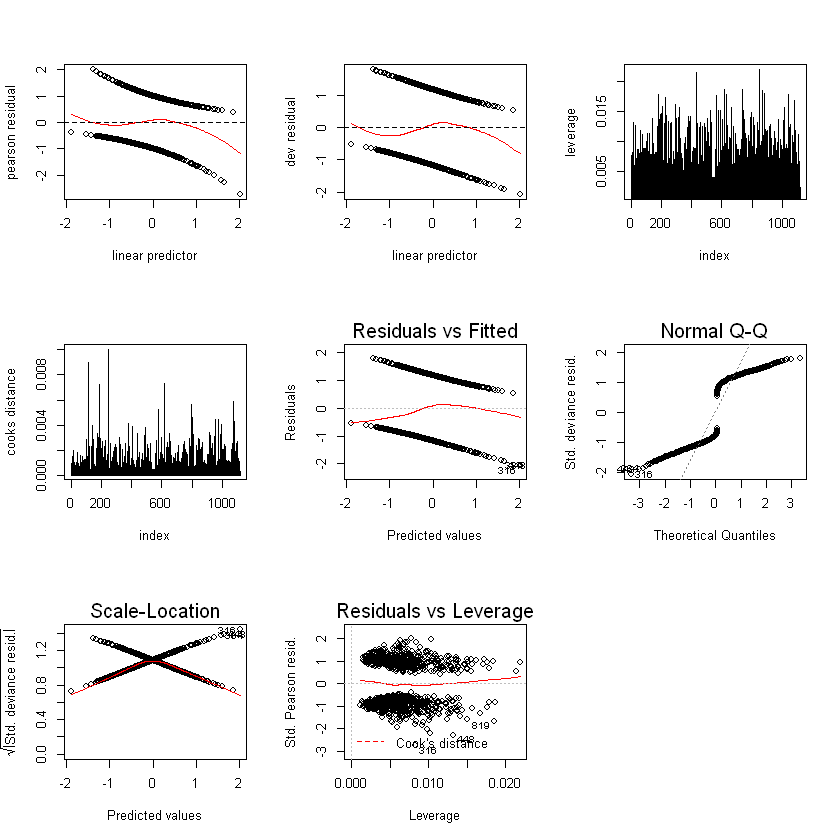

In [49]:
#Code taken from 	Rebecka Jörnsten assignments 
par(mfrow = c(3,3))
res<-residuals(gg,"pearson")
plot(logit(gg$fit),res,xlab="linear predictor",ylab="pearson residual")
ll<-loess(res[sort.list(logit(gg$fit))]~sort(logit(gg$fit)))
lines(ll$x,ll$fit,col=2)
abline(h=0,lty=2)
res<-residuals(gg,"deviance")
plot(logit(gg$fit),res,xlab="linear predictor",ylab="dev residual")
ll<-loess(res[sort.list(logit(gg$fit))]~sort(logit(gg$fit)))
lines(ll$x,ll$fit,col=2)
abline(h=0,lty=2)
hh<-hatvalues(gg)
plot(hh,type="h",ylab="leverage",xlab="index")
library(stats)
dd<-cooks.distance(gg)
plot(dd,type="h",ylab="cooks distance",xlab="index")
plot(gg)

### 4. Testing the interactions in the model 

In [50]:
gg<-glm(EVER_SMOKED~(AGE+BIS_Cog_Instability+BIS_self_control+DOS_Fin_Investment+DOS_Fin_Gambling+DOS_HealthSafety)^3,data=data,family="binomial")
print(summary(gg))


Call:
glm(formula = EVER_SMOKED ~ (AGE + BIS_Cog_Instability + BIS_self_control + 
    DOS_Fin_Investment + DOS_Fin_Gambling + DOS_HealthSafety)^3, 
    family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1791  -1.0573  -0.6802   1.1165   2.0314  

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                              1.2658733 10.3427343
AGE                                                     -0.1622123  0.1892456
BIS_Cog_Instability                                      0.4575775  1.2571285
BIS_self_control                                         0.1266279  0.5159896
DOS_Fin_Investment                                      -0.9471682  0.8208744
DOS_Fin_Gambling                                         0.7314048  0.8844550
DOS_HealthSafety                                        -0.0985885  0.4127452
AGE:BIS_Cog_Instability                                  0.

In [53]:
gg<-glm(EVER_SMOKED~AGE+BIS_Cog_Instability+BIS_self_control+DOS_Fin_Investment+DOS_Fin_Gambling+DOS_HealthSafety+BIS_Cog_Instability*BIS_self_control*DOS_Fin_Gambling ,data=data,family="binomial")
print(summary(gg))
selg<-step(gg,trace=F)
ss<-summary(selg)
c2<-solve(diag(diag(ss$cov.sc)))^{1/2}%*%ss$cov.sc%*%solve(diag(diag(ss$cov.sc)))^{1/2}
print(c2)



Call:
glm(formula = EVER_SMOKED ~ AGE + BIS_Cog_Instability + BIS_self_control + 
    DOS_Fin_Investment + DOS_Fin_Gambling + DOS_HealthSafety + 
    BIS_Cog_Instability * BIS_self_control * DOS_Fin_Gambling, 
    family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5732  -1.0636  -0.7473   1.1322   1.9398  

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                           -8.567854   2.844747
AGE                                                    0.015186   0.005512
BIS_Cog_Instability                                    1.051475   0.356666
BIS_self_control                                       0.357497   0.163014
DOS_Fin_Investment                                    -0.041784   0.016050
DOS_Fin_Gambling                                       1.516307   0.398713
DOS_HealthSafety                                       0.055738   0.011133
BIS_Cog_Instability:BI

__ Notes__ 
* We test  the model for all two and three ways interactions. We find and inc a set of signifinant two way interactions and a three way interaction as well. __ However __ we are not going to include this in our final model because it's dosen't include any better prediction. There is also very strong collintary 
* We did this with both * and : 

### 5. Testing final model. 
* We could have run some more model selection tests, such as backward model sectional and cross validation. However with limited time we now move to testing the model on our test dataset. 

In [60]:
gg<-glm(EVER_SMOKED~AGE+BIS_Cog_Instability+BIS_self_control+DOS_Fin_Investment+DOS_Fin_Gambling+DOS_HealthSafety ,data=test_data,family="binomial")

selg<-step(gg,trace=F)

pp<-predict(selg,type="response")
pp[pp<.5]<-0
pp[pp>=.5]<-1
table(pp,test_data$EVER_SMOKED)
print(c("Misclassification error=", round(sum(pp!=test_data$EVER_SMOKED)/length(test_data$EVER_SMOKED),3)))


   
pp   No Yes
  1   1 199

[1] "Misclassification error=" "1"                       


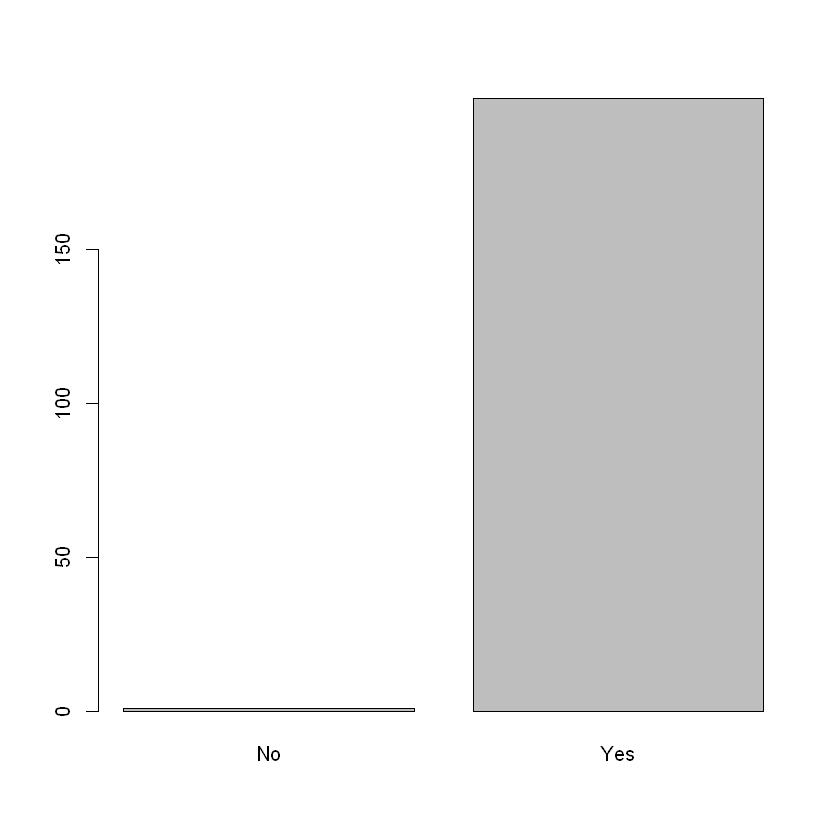

In [58]:
plot(test_data$EVER_SMOKED)

In [ ]:
gg<-glm(EVER_SMOKED~AGE+BIS_Cog_Instability+BIS_self_control+DOS_Fin_Investment+DOS_Fin_Gambling+DOS_HealthSafety ,data=test_data,family="binomial")


library(tree)
tree1 <- tree(EVER_SMOKED ~ BIS_Cog_Instability + AGE + BIS_self_control + DOS_Fin_Investment + , data = data)

#par(nfrow=c(1,1))
plot(tree1)
text(tree1)
